In [279]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from astropy import units as u
from numpy import ma
import numpy as np
from astropy.table import Table, Column, MaskedColumn, pprint
from astropy.io import fits
from astropy.wcs import WCS
from scipy import integrate
from astropy.coordinates import SkyCoord


# Imports necessary for Source Catalog
from photutils.background import Background2D, MedianBackground
from astropy.convolution import convolve
from photutils.segmentation import make_2dgaussian_kernel
from photutils.segmentation import detect_sources
from photutils.segmentation import deblend_sources
from photutils.segmentation import SourceFinder
from photutils.segmentation import SourceCatalog
from scipy import ndimage
from scipy.ndimage import binary_erosion
from numpy import loadtxt
from photutils.aperture import CircularAperture, aperture_photometry, EllipticalAperture
from astropy.coordinates import match_coordinates_sky

# Imports necessary for visulisation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import simple_norm


from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.convolution import convolve, Moffat2DKernel
import matplotlib.pyplot as plt
import numpy as np
from mpdaf.obj import Cube, Image

# Imports for cutouts and convolution

from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.convolution import convolve, Moffat2DKernel
import matplotlib.pyplot as plt
import numpy as np
from mpdaf.obj import Cube, Image
import os


from mpdaf.obj import Cube
from mpdaf.drs import PixTable
from astropy.io import fits
from astropy.wcs import WCS as AstropyWCS
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube, Spectrum
from scipy.ndimage import gaussian_filter1d

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS
from mpdaf.obj import Spectrum, Cube
from astropy.coordinates import SkyCoord
from astropy.convolution import convolve, Gaussian1DKernel



In [280]:
fname = '/Users/s2537809/comb_Q2225.fits'

#fname2 = '/Users/s2537809/comb_Q0000.fits'

data = fits.open(fname)
cube1 = Cube(fname)
cube = SpectralCube.read(fname)
#cube = SpectralCube.read(fname2)


In [281]:
cube1.info()    

[INFO] 2216 x 146 x 96 Cube (/Users/s2537809/comb_Q2225.fits)
[INFO] .data(2216 x 146 x 96) (no unit), no noise
[INFO] center:(05:27:13.827244,22:25:14.55271139) size:(18.250",12.000") step:(0.125",0.125") rot:-0.0 deg frame:FK5
[INFO] wavelength: min:1.93 max:2.47 step:0.00 um


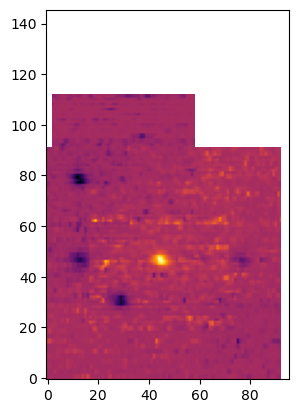

In [282]:
# cube1 2d image
image = cube1.mean(axis=0)

# plot
plt.figure()
plt.imshow(image.data, origin='lower', cmap='inferno')


In [283]:
print(cube)


SpectralCube with shape=(2216, 146, 96):
 n_x:     96  type_x: RA---TAN  unit_x: deg    range:   336.308979 deg:  336.312293 deg
 n_y:    146  type_y: DEC--TAN  unit_y: deg    range:     5.451324 deg:    5.456358 deg
 n_s:   2216  type_s: WAVE      unit_s: um     range:        1.929 um:       2.471 um


In [284]:
# extract a 1d spectrum from cube at 

In [285]:
# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, median_filter
from scipy.signal import medfilt2d
from scipy.optimize import curve_fit


from astropy.io import fits
from astropy.table import Table



cube = fits.getdata(fname)
hdr = fits.getheader(fname)


wl = (np.arange(hdr['NAXIS3'])-hdr['CRPIX3'])*hdr['CDELT3'] + hdr['CRVAL3']
x = np.arange(hdr['NAXIS1'])
y = np.arange(hdr['NAXIS2'])
l = np.arange(hdr['NAXIS3'])


X, Y = np.meshgrid(x, y)


white_img = np.nanmedian(cube[200:-500, :, :], axis=0)


x0, y0 = 47, 45


# 1D extraction aper:
r_ext = 3
aper = (X-x0)**2 + (Y-y0)**2 < r_ext**2
aper_cube = np.resize(aper, cube.shape)


# psf aper:
r_psf = 40
aper_psf = (X-x0)**2 + (Y-y0)**2 < r_psf**2
aper_psf_cube = np.resize(aper_psf, cube.shape)


spec1d = np.nansum(cube*aper_cube, axis=(1, 2))
# Define mask for fitting the continuum:
imin, imax = 1000, 1400
mask = (l > 1003) & (l < 1100)
mask += (l > 1281) & (l < 1295)
mask += (l > 1371) & (l < 1390)
mask += (l > 1316) & (l < 1326)


poly_order = 4
coeff = np.polyfit(l[mask], spec1d[mask], poly_order)
cont = np.poly1d(coeff)(l)


# Construct PSF image:
aper_psf_cube = aper_psf_cube.T * mask
aper_psf_cube = aper_psf_cube.T
psf = np.nansum((cube*aper_psf_cube), axis=0)
# psf = np.nansum((cube), axis=0)
psf = psf / np.nansum(psf*aper)


# Continuum only
cont_cube = np.resize(psf, cube.shape)
cont_cube = (cont_cube.T * cont).T
psf_sub = cube - cont_cube


fits.writeto('Q2_psfsub.fits', psf_sub[imin:imax], header=hdr, overwrite=True)




/Users/s2537809/anaconda3/envs/py3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


need to subtract the psf of the quasar 

same rlamda range for different apetures 
pick peak snr 
sum all flux in large bin this is max calculate what is missing 

In [286]:
x0, y0 = 44, 47

# find spec 1d's  for array of aperture sizes
def spec1d_aper(r_ext):
    aper = (X-x0)**2 + (Y-y0)**2 < r_ext**2
    aper_cube = np.resize(aper, cube.shape)
    spec1d = np.nansum(cube*aper_cube, axis=(1, 2))
    return spec1d

r_exts = np.arange(1, 25, 1)

spec1ds = [spec1d_aper(r_ext) for r_ext in r_exts]
print (spec1ds)


[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=fl

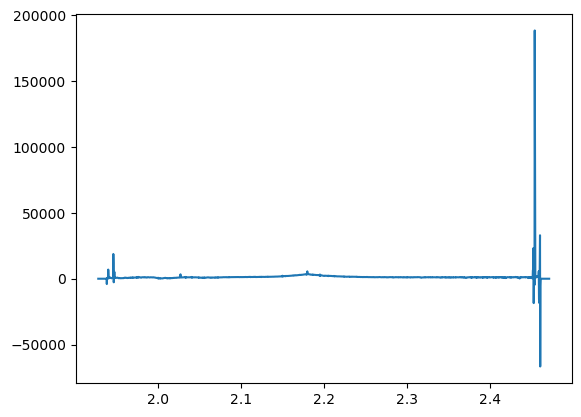

In [287]:

# plot the specttrum aper_cube 
spec1d = np.nansum(cube*aper_cube, axis=(1, 2))
plt.plot(wl, spec1d)
plt.show()



In [288]:
# Define mask for fitting the continuum:
imin, imax = 2.33, 2.35
mask = (wl > imin) & (wl < imax)



In [289]:
# find mean flux for spectrum in masked region
mean_flux = np.nanmean(spec1d[mask])
print(mean_flux)

# find the standard deviation of the flux in the masked region
std_flux = np.nanstd(spec1d[mask])
print(std_flux)

# find the signal to noise ratio
snr = mean_flux / std_flux
print(snr)

1066.1161
72.26582
14.752701


3


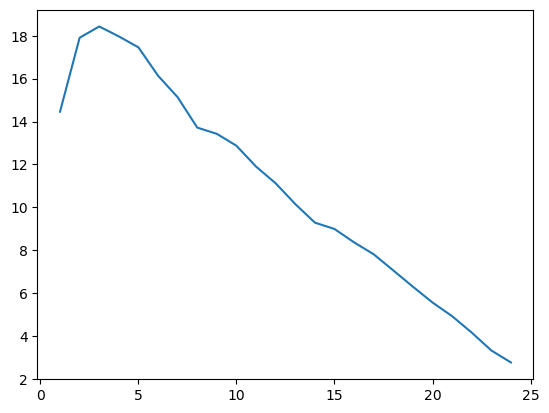

In [290]:
# find snr for array of spec 1ds
def snr(spec1d):
    mean_flux = np.nanmean(spec1d[mask])
    std_flux = np.nanstd(spec1d[mask])
    return mean_flux / std_flux

snrs = [snr(spec1d) for spec1d in spec1ds]


print(r_exts[np.argmax(snrs)])

plt.plot(r_exts, snrs)
plt.show()

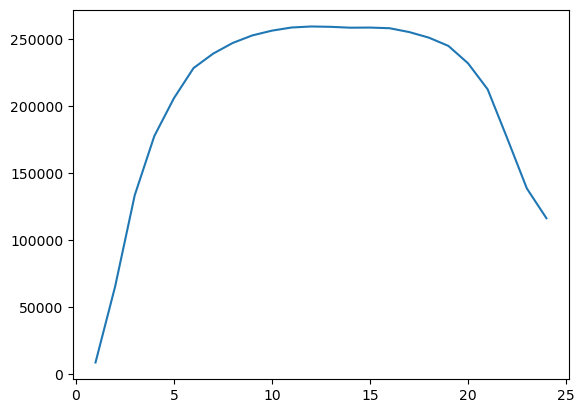

12


In [291]:
# find the cummulalative flux for each spectrum in 1d specs
def cum_flux(spec1d):
    return np.nansum(spec1d[mask])

cum_fluxes = [cum_flux(spec1d) for spec1d in spec1ds]

plt.plot(r_exts, cum_fluxes)
plt.show()


# print aperture of peak flux
print(r_exts[np.argmax(cum_fluxes)])

# find what precentage of the peak flux is detected in each aperture




In [306]:
# make subcube for apperturee 12
r_ext = 12
aper = (X-x0)**2 + (Y-y0)**2 < r_ext**2
aper_cube = np.resize(aper, cube.shape)
subcube = cube[aper_cube]

# find the peak flux


In [307]:
# psf aper:
r_psf = 12
aper_psf = (X-x0)**2 + (Y-y0)**2 < r_psf**2
aper_psf_cube = np.resize(aper_psf, cube.shape)

# Construct PSF image:
aper_psf_cube = aper_psf_cube.T * mask
aper_psf_cube = aper_psf_cube.T
psf = np.nansum((cube*aper_psf_cube), axis=0)
#psf = np.nansum((cube), axis=0)
psf = psf / np.nansum(psf*aper)

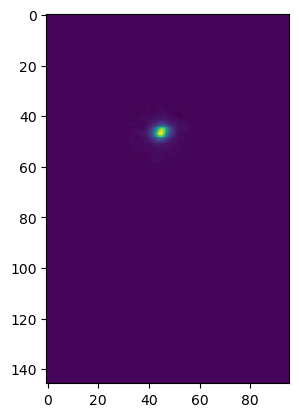

In [308]:
# plot the psf
plt.imshow(psf)

# find the total flux in the psf
total_flux = np.nansum(psf)

# normalise to the max flux
psf = psf / total_flux

# plot the normalised psf
plt.imshow(psf)

# weight spectrum extraction by psf at radius 3
spec1d = np.nansum((cube*psf), axis=(1, 2))/ np.nansum(psf**2)




In [309]:
mean_flux = np.nanmean(spec1d[mask])
std_flux = np.nanstd(spec1d[mask])
snr = mean_flux / std_flux

print(snr)

18.933773


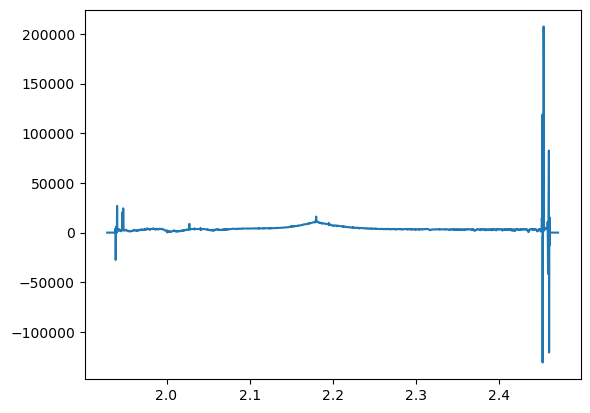

In [310]:
# plot the spectrum
plt.plot(wl, spec1d)

In [252]:

# fit polynomial to spectrum
poly_order = 4
coeff = np.polyfit(l[mask], spec1d[mask], poly_order)
cont = np.poly1d(coeff)(l)

# subtract continuum
cont_cube = np.resize(psf, cube.shape)
cont_cube = (cont_cube.T * cont).T
psf_sub = cube - cont_cube


Text(0, 0.5, 'Flux ')

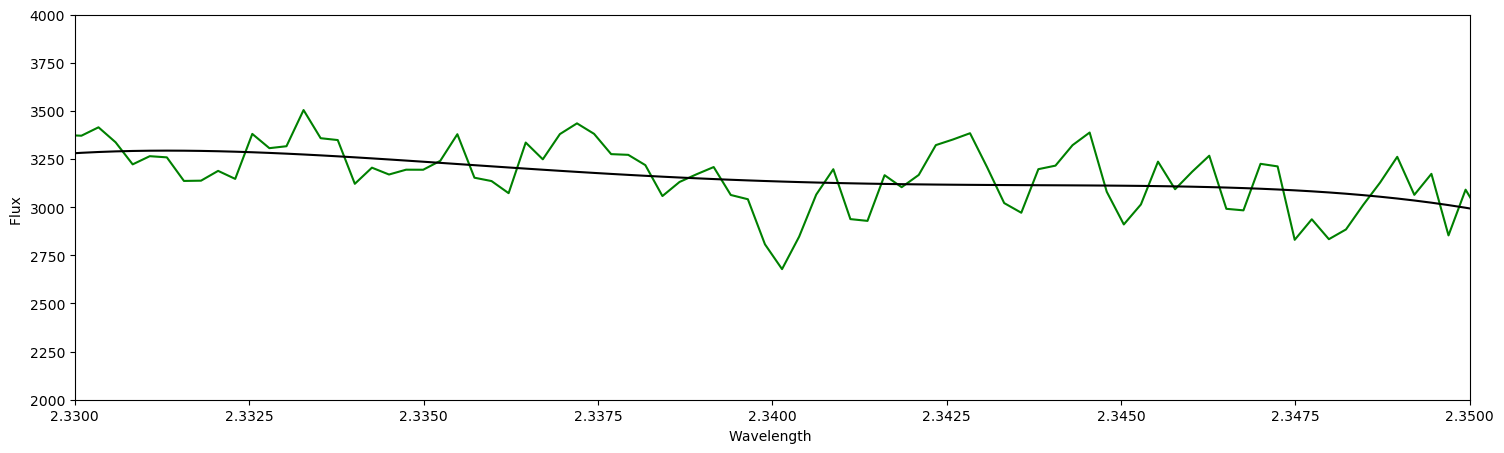

In [130]:
plt.figure(figsize=(18, 5))
plt.plot(wl, spec1d, color='green')
plt.plot(wl, cont, color='black')
plt.xlim(2.33,2.35)
plt.ylim(2000, 4000)
plt.xlabel('Wavelength ')
plt.ylabel('Flux ')

In [85]:
# Function to calculate redshift
def calculate_redshift(observed_wavelength, rest_wavelength):
    redshift = (observed_wavelength - rest_wavelength) / rest_wavelength
    return redshift


rest_wavelength_ha = 6562.8  


observed_wavelength_ha = 21324.9

# Calculate redshift
redshift_ha = calculate_redshift(observed_wavelength_ha, rest_wavelength_ha)
print(f"The redshift (z) is: {redshift_ha:.4f}")


The redshift (z) is: 2.2494


In [166]:
# open the atmospheric transmission
atm = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_0p05.txt', format='ascii')
atm_0p05 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_0p05.txt', format='ascii')
atm_0p25 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_0p25.txt', format='ascii')
atm_0p50 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_0p50.txt', format='ascii')
atm_1p0 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_1p0.txt', format='ascii')
atm_1p5 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_1p5.txt', format='ascii')
atm_2p5 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_2p5.txt', format='ascii')
atm_3p5 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_3p5.txt', format='ascii')
atm_20p0 = Table.read('/Users/s2537809/Downloads/transfer_8284493_files_8158ff51/atmospheric_transmission/trans_atm_vac_20p0.txt', format='ascii')


wl,T_abs,T_abs_smooth,T_abs_scaled
float64,float64,float64,float64
1928.54,1.30221e-16,0.0007356216900065262,3.5563004291298768
1928.785,2.3557e-14,0.0008840349529754846,4.2737917129722405
1929.03,3.41192e-05,0.00103612169037318,5.0090420961788436
1929.275,0.00182977,0.0011919542151159594,5.762401169387005
1929.52,0.00308124,0.0013569284580188087,6.55995510070947
1929.765,0.00777442,0.001543111692858399,7.460042097805693
1930.01,0.00055612,0.0017707139193798584,8.560365683753792
1930.255,5.77939e-14,0.0020625702727282784,9.971320375217633
1930.5,1.65639e-05,0.002443787084123816,11.814280592915193


Optimized kernel size: 5.0


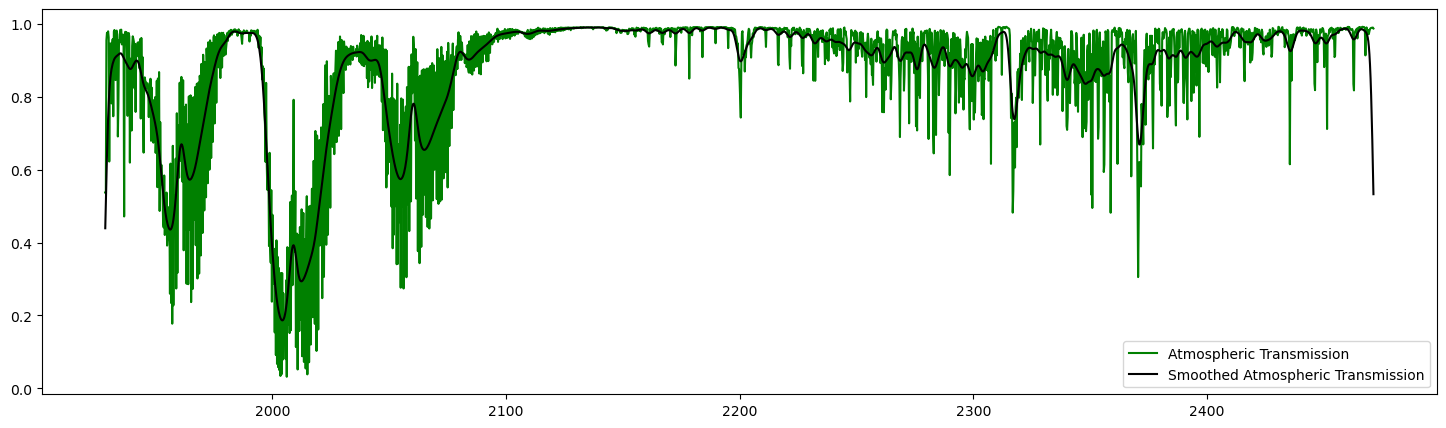

In [145]:
import numpy as np
from astropy.convolution import Gaussian1DKernel, convolve
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# plot the atmospheric transmission
plt.figure(figsize=(18, 5))
plt.plot(atm['wl'], atm['T_abs'], label='Atmospheric Transmission', color='green')

# Define the chi-squared objective function for minimization
def chi2(params):
    # Round kernel width to ensure kernel size is odd
    kernel_size = np.ceil(params[0])
    
    # Create the kernel with the nearest odd size
    if kernel_size % 2 == 0:
        kernel_size += 1  # Ensure it's odd
        
    kernel = Gaussian1DKernel(kernel_size)
    
    # Apply the smoothing kernel
    atm['T_abs_smooth'] = convolve(atm['T_abs'], kernel)
    
    # Return the chi-squared (sum of squared differences)
    return np.sum((atm['T_abs'] - atm['T_abs_smooth'])**2)

# Minimize the chi-squared function
initial_guess = [4]  # Start with an initial guess for the kernel width
res = minimize(chi2, initial_guess)

# Use the optimized kernel width for smoothing
best_kernel_size = np.ceil(res.x[0])
if best_kernel_size % 2 == 0:
    best_kernel_size += 1  # Ensure it's odd

# print the best kernel size
print(f"Optimized kernel size: {best_kernel_size}")


kernel = Gaussian1DKernel(best_kernel_size)
atm['T_abs_smooth'] = convolve(atm['T_abs'], kernel)

# Plot the results
plt.plot(atm['wl'], atm['T_abs_smooth'], label='Smoothed Atmospheric Transmission', color='black')
plt.legend()
plt.show()


In [124]:

# apply scaling to the atmospheric transmission
atm['T_abs_scaled'] = atm['T_abs_smooth'] * 3800

# adjust wl to match the cube
atm['wl'] = atm['wl'] / 1000



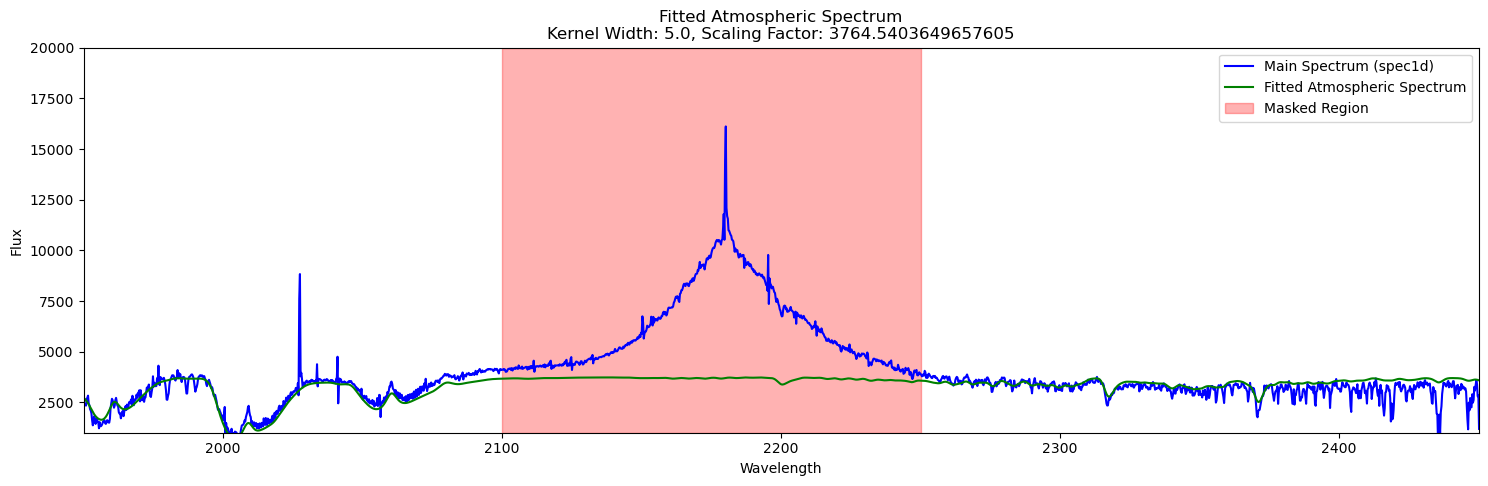

Optimized Kernel Width: 5.0
Optimized Scaling Factor: 3764.5403649657605


In [164]:
import numpy as np
from astropy.convolution import Gaussian1DKernel, convolve
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the chi-squared objective function for minimization
def chi2(params):
   
    # Round kernel width to ensure kernel size is odd
    kernel_size = np.ceil(params[0])
    if kernel_size % 2 == 0:
        kernel_size += 1  # Ensure it's odd
        
    kernel = Gaussian1DKernel(kernel_size)
    
    # Apply the smoothing kernel to the atmospheric transmission
    atm['T_abs_smooth'] = convolve(atm['T_abs'], kernel)
    
    # Apply the scaling factor
    atm['T_abs_scaled'] = atm['T_abs_smooth'] * params[1]
    
    # Create a mask to exclude the wavelengths between 2100 and 2200
    mask = (atm['wl'] < 2100) | (atm['wl'] > 2250)
    
    # Calculate chi-squared using only the unmasked data
    residual = np.sum((spec1d[mask] - atm['T_abs_scaled'][mask])**2)
    
    return residual

# Initial guess for the parameters [kernel width, scaling factor]
initial_guess = [4.0, 3800.0]

# Minimize the chi-squared function to fit both the kernel width and scaling factor
res = minimize(chi2, initial_guess)

# Extract the optimized kernel width and scaling factor
best_kernel_size = np.ceil(res.x[0])
if best_kernel_size % 2 == 0:
    best_kernel_size += 1  # Ensure it's odd
best_scaling_factor = res.x[1]

# Apply the optimized kernel and scaling factor to the atmospheric spectrum
kernel = Gaussian1DKernel(best_kernel_size)
atm['T_abs_smooth'] = convolve(atm['T_abs'], kernel)
atm['T_abs_scaled'] = atm['T_abs_smooth'] * best_scaling_factor

# Plot the final result
plt.figure(figsize=(18, 5))
plt.plot(atm['wl'], spec1d, label='Main Spectrum (spec1d)', color='blue')
plt.plot(atm['wl'], atm['T_abs_scaled'], label='Fitted Atmospheric Spectrum', color='green')
plt.axvspan(2100, 2250, color='red', alpha=0.3, label='Masked Region')  # Highlight the masked region
plt.legend()
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.ylim(1000, 20000)
plt.xlim(1950, 2450)
plt.title(f'Fitted Atmospheric Spectrum\nKernel Width: {best_kernel_size}, Scaling Factor: {best_scaling_factor}')
plt.show()

# Print the best-fitting parameters
print(f"Optimized Kernel Width: {best_kernel_size}")
print(f"Optimized Scaling Factor: {best_scaling_factor}")


In [190]:
import numpy as np
from astropy.convolution import Gaussian1DKernel, convolve
from scipy.optimize import minimize

# Define the chi-squared objective function for minimization
def chi2(params, atm, spec1d):
    # Round kernel width to ensure kernel size is odd
    kernel_size = np.ceil(params[0])
    if kernel_size % 2 == 0:
        kernel_size += 1  # Ensure it's odd
        
    kernel = Gaussian1DKernel(kernel_size)
    
    # Apply the smoothing kernel to the atmospheric transmission
    atm['T_abs_smooth'] = convolve(atm['T_abs'], kernel)
    
    # Apply the scaling factor
    atm['T_abs_scaled'] = atm['T_abs_smooth'] * params[1]
    
    # Define masked region 
    mask = (atm['wl'] < 2100) | (atm['wl'] < 1950)
    
    # Calculate chi-squared (sum of squared residuals, excluding the masked region)
    residual = np.sum((spec1d[mask] - atm['T_abs_scaled'][mask])**2)
    
    return residual


In [191]:
# Function to fit and return the best kernel size and scaling factor for each atmospheric spectrum
def fit_atmosphere(atm, spec1d, initial_guess=[4.0, 3800.0]):
    res = minimize(chi2, initial_guess, args=(atm, spec1d))
    
    # Extract the optimized kernel width and scaling factor
    best_kernel_size = np.ceil(res.x[0])
    if best_kernel_size % 2 == 0:
        best_kernel_size += 1  # Ensure it's odd
    best_scaling_factor = res.x[1]
    
    # chi-squared for the best-fit parameters
    chi2_best = chi2([best_kernel_size, best_scaling_factor], atm, spec1d)
    
    return best_kernel_size, best_scaling_factor, chi2_best


In [192]:

atmospheres = [atm_0p05, atm_0p25, atm_0p50, atm_1p0, atm_1p5, atm_2p5, atm_3p5, atm_20p0]
labels = ['0p05', '0p25', '0p50', '1p0', '1p5', '2p5', '3p5', '20p0']

# Initial guess for kernel width and scaling factor
initial_guess = [4.0, 3800.0]

results = []

for atm, label in zip(atmospheres, labels):
    best_kernel_size, best_scaling_factor, chi2_value = fit_atmosphere(atm, spec1d, initial_guess)
    results.append((label, best_kernel_size, best_scaling_factor, chi2_value))
    print(f"Atmosphere {label}: Kernel Width = {best_kernel_size}, Scaling Factor = {best_scaling_factor}")

# Find the best-fitting atmosphere by minimum chi-squared
best_fit = min(results, key=lambda x: x[3])
print(f"\nBest-fitting atmosphere: {best_fit[0]} ")




Atmosphere 0p05: Kernel Width = 5.0, Scaling Factor = 3747.6235494525945
Atmosphere 0p25: Kernel Width = 5.0, Scaling Factor = 3893.770960456468
Atmosphere 0p50: Kernel Width = 5.0, Scaling Factor = 3998.6677562542573
Atmosphere 1p0: Kernel Width = 5.0, Scaling Factor = 4129.827595439374
Atmosphere 1p5: Kernel Width = 5.0, Scaling Factor = 4215.102319037653
Atmosphere 2p5: Kernel Width = 5.0, Scaling Factor = 4326.359794156972
Atmosphere 3p5: Kernel Width = 5.0, Scaling Factor = 4399.254981257977
Atmosphere 20p0: Kernel Width = 5.0, Scaling Factor = 4834.414859488886

Best-fitting atmosphere: 1p5 


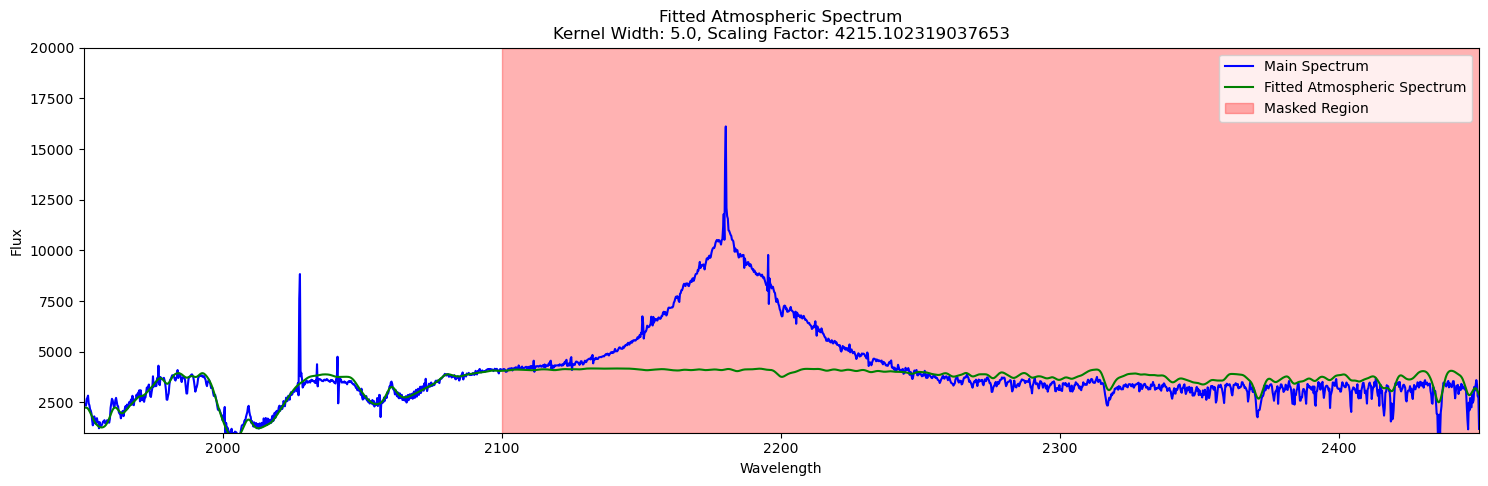

In [193]:
# get atm for best fit
atm_best = atmospheres[labels.index(best_fit[0])]
best_kernel_size = best_fit[1]
best_scaling_factor = best_fit[2]

plt.figure(figsize=(18, 5))
plt.plot(atm_best['wl'], spec1d, label='Main Spectrum', color='blue')
plt.plot(atm_best['wl'], atm_best['T_abs_scaled'], label='Fitted Atmospheric Spectrum', color='green')

# Highlight the masked region 
plt.axvspan(2100, 2500, color='red', alpha=0.3, label='Masked Region')
#plt.axvspan(1950, 2100, color='red', alpha=0.3, label='Masked Region')

plt.legend()
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.ylim(1000, 20000)
plt.xlim(1950, 2450)
plt.title(f'Fitted Atmospheric Spectrum\nKernel Width: {best_kernel_size}, Scaling Factor: {best_scaling_factor}')
plt.show()


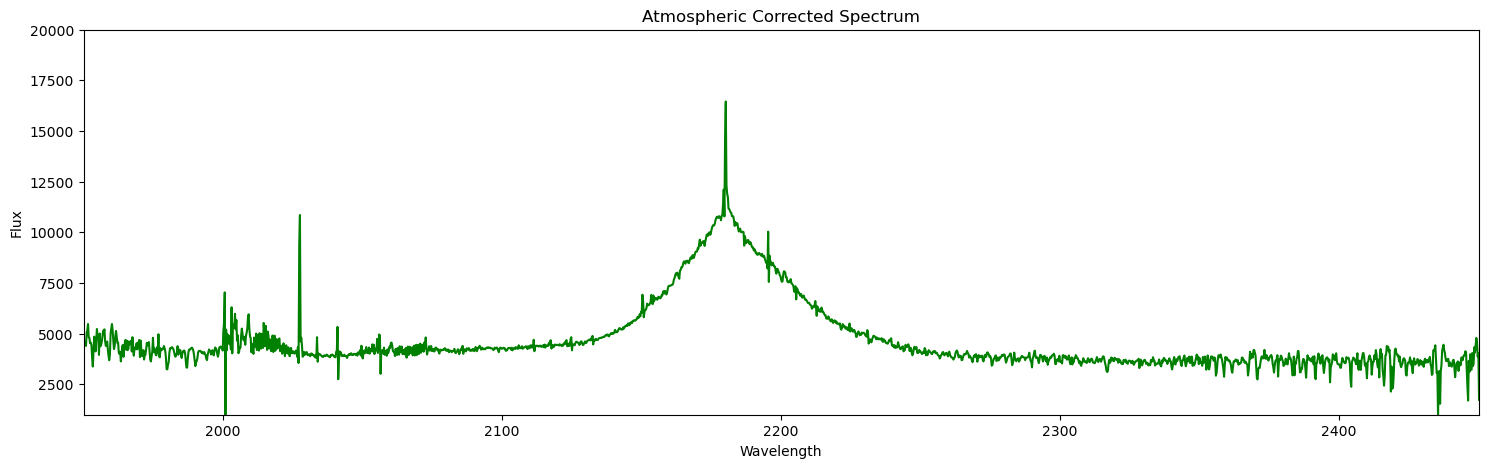

In [208]:
# Subtract the fitted atmospheric spectrum from the main spectrum
# Apply the scaling factor to the atmospheric transmission

# atmospheric correction without continuum correction
atm_corr = (atm_best['T_abs_scaled']/4215.102319037653)

spec1d_atm_sub = spec1d /  atm_corr

# Plot the atmospheric-subtracted spectrum
plt.figure(figsize=(18, 5))
plt.plot(atm_best['wl'], spec1d_atm_sub, color='green')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.ylim(1000, 20000)
plt.xlim(1950, 2450)
plt.title('Atmospheric Corrected Spectrum')
plt.show()

need to do this for each spaxel, create cube with this  as 1d array at each spaxel so can then divide through by that 

In [212]:
# Make blank cube the size of the original cube
blank_cube = np.ones(cube.shape)

# Apply the atmospheric correction to the blank cube
atm_corr_cube = (blank_cube.T * atm_corr).T

print(atm_corr_cube.shape)
print(cube.shape)

# Correct the main cube for atmospheric absorption
cube_atm_corr = cube / atm_corr_cube



(2216, 146, 96)
(2216, 146, 96)


Text(0, 0.5, 'Flux ')

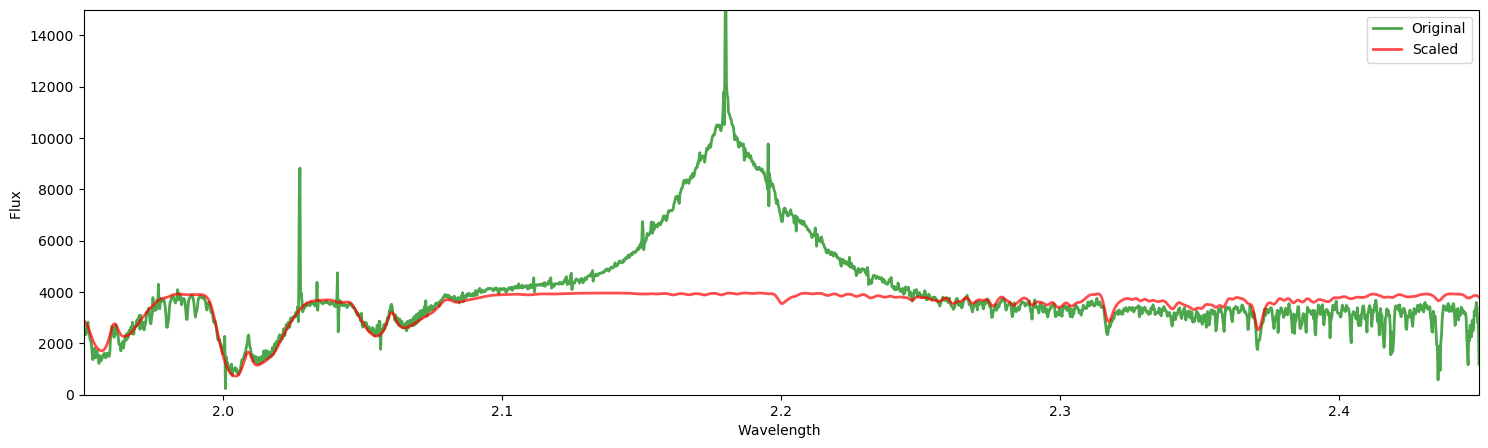

In [115]:
# need to adjust kernal and scale to fit 

plt.figure(figsize=(18, 5))
plt.plot(wl, spec1d, label='Original', lw=2, alpha=0.7, color='green')
plt.plot(atm['wl'], atm['T_abs_scaled'], label='Scaled', lw=2, alpha=0.7, color='red')
plt.legend()
plt.xlim(1.95,2.45)
plt.ylim(0, 15000)
plt.xlabel('Wavelength ')
plt.ylabel('Flux ')

subtract thw atm then the cont